# 課題１

## 式を実装

### 必要なライブラリをインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### パラメータの設定

In [2]:
#parameter
a_c = 6.25             #台車駆動系のパラメータ
b_c = 4.36             #台車駆動系のパラメータ
m_p = 1.07 * 10 ** -1  #振り子の質量[kg]
l_p = 2.30 * 10 ** -1  #振り子の軸から重心までの長さ[m]
L_p = 3.80 * 10 ** -1  #振り子の全長[m]
J_p = 1.59 * 10 ** -3  #振り子の重心周りの慣性モーメント[kg m^2]
mu_p = 2.35 * 10 ** -4 #振り子の粘性摩擦係数 [kg m^2/s]
g = 9.81               #重力加速度[m/s^2]

### 式１　加速度を求める式

In [3]:
def Calculate_ddz(dz, v):
    '''
    dz : velocity
    v : control input
    ddz : acceleration
    '''
    return a_c * dz + b_c * v

### 式２　各加速度を求める指揮

In [6]:
'''def formula2(q):
    m_p * l_p * np.cos(q) * ddz + (J_p + m_p * l_p**2) * ddq = -mu_p * dq + m_p * g * l_p * np.sin(q)
    return 0
'''
def Calculate_ddq(dq, q, ddz):
  '''
  q : angle
  dq : angular velocity
  ddz : acceleration
  ddq : angular acceleration
  '''    
  return (- mu_p * dq + m_p * g * l_p * np.sin(q) - m_p * l_p * np.cos(q) * ddz)/(J_p + m_p * l_p**2)


### 角度($-\pi$ ~ $\pi$)

In [7]:
def radian(q):
  #-pi ~ pi
  return (q % (2 * np.pi)) if q % (2 * np.pi) <= np.pi else (q % (2 * np.pi)) - 2* np.pi

# Optimal
### opt_stateを入力としたグラフ

In [9]:
#Euler method
def Euler(z,q,dz,dq,ddz,v):
  '''
  z : position
  q : angle
  dz : velosity
  dq : angulay velocity
  ddz : acceleration
  ddq : angular acceleration
  '''
  ddq = Calculate_ddq(dq, q, ddz)
  dq -= ddq * h
  q -= dq * h
  ddz = Calculate_ddz(dz,v)
  dz -= ddz * h
  z -= dz * h
  q = radian(q)
  return z,q,dz,dq,ddz,ddq

### opt_ctrlを読み込み

In [10]:
contrl = np.genfromtxt('opt_ctrl.csv')

### 初期値

In [13]:
#initial
q0 = np.pi
dq0 = 0
z0 = 0
dz0 = 0

### メイン

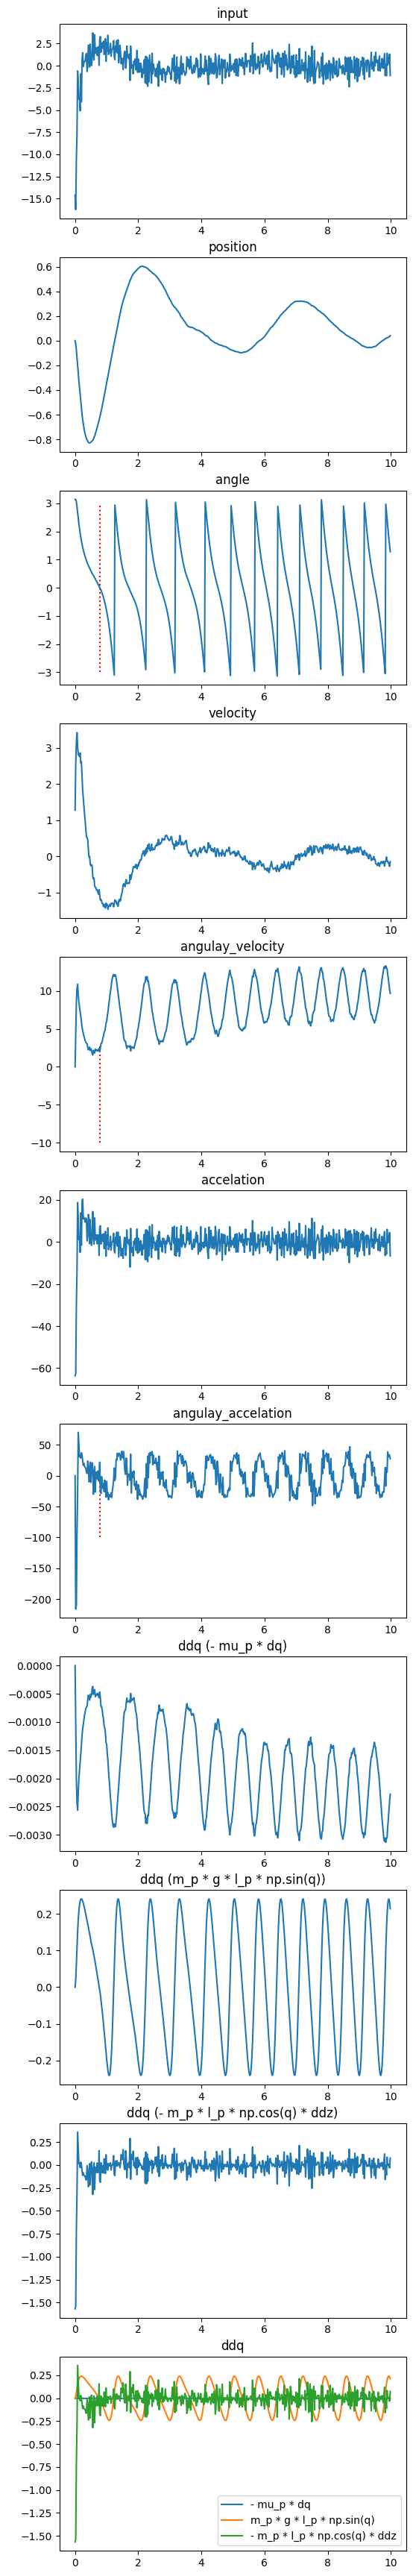

In [36]:
#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity
ddz = 0.0

#v=0.0      #External input

h = 0.02  #step width
t = np.arange(0,10,h)

#logs
posi = [] #position
velo = [] #velocity
acce = [] #acceleration
angl = [] #angle
angl_v = [] #angulay velocity
angl_a = [] #angular acceleration
#ddq function separation
a = []
b = []
c = []

#loop 0~10s
for v in contrl:
  #
  posi.append(z)
  angl.append(q)
  z,q,dz,dq,ddz,ddq = Euler(z,q,dz,dq,ddz,v)
  a.append(-mu_p*dq)
  b.append(m_p*g*l_p*np.sin(q))
  c.append(-m_p*l_p*np.cos(q)*ddz)
  velo.append(dz)
  angl_v.append(dq)
  acce.append(ddz)
  angl_a.append(ddq)

#figure
fig = plt.figure(figsize=(6,44))
ax1 = fig.add_subplot(11,1,1)
ax1.plot(t,contrl)
ax1.set_title('input')
ax2 = fig.add_subplot(11,1,2)
ax2.plot(t,posi)
ax2.set_title('position')
ax3 = fig.add_subplot(11,1,3)
ax3.plot(t,angl)
ax3.set_title('angle')
zero = [t[i] for i in range(len(angl)) if abs(angl[i]) < 0.01 ]
if len(zero) != 0:
    ax3.vlines(zero[0], -3, 3,color='r', linestyles='dotted')
ax4 = fig.add_subplot(11,1,4)
ax4.plot(t,velo)
ax4.set_title('velocity')
ax5 = fig.add_subplot(11,1,5)
ax5.plot(t,angl_v)
ax5.set_title('angulay_velocity')
if len(zero) != 0:
    ax5.vlines(zero[0], -10, 3,color='r', linestyles='dotted')
ax6 = fig.add_subplot(11,1,6)
ax6.plot(t,acce)
ax6.set_title('accelation')
ax7 = fig.add_subplot(11,1,7)
ax7.plot(t,angl_a)
ax7.set_title('angulay_accelation')
if len(zero) != 0:
    ax7.vlines(zero[0], -100, 3,color='r', linestyles='dotted')
ax8 = fig.add_subplot(11,1,8)
ax8.plot(t,a)
ax8.set_title('ddq (- mu_p * dq)')
ax9 = fig.add_subplot(11,1,9)
ax9.plot(t,b)
ax9.set_title('ddq (m_p * g * l_p * np.sin(q))')
ax10 = fig.add_subplot(11,1,10)
ax10.plot(t,c)
ax10.set_title('ddq (- m_p * l_p * np.cos(q) * ddz)')
ax11 = fig.add_subplot(11,1,11)
ax11.plot(t,a,label='- mu_p * dq')
ax11.plot(t,b,label='m_p * g * l_p * np.sin(q)')
ax11.plot(t,c,label='- m_p * l_p * np.cos(q) * ddz')
ax11.set_title('ddq')
ax11.legend()
plt.show()


### opt_stateの読み込み、グラフ化

In [21]:
parameter = np.genfromtxt('opt_state.csv')

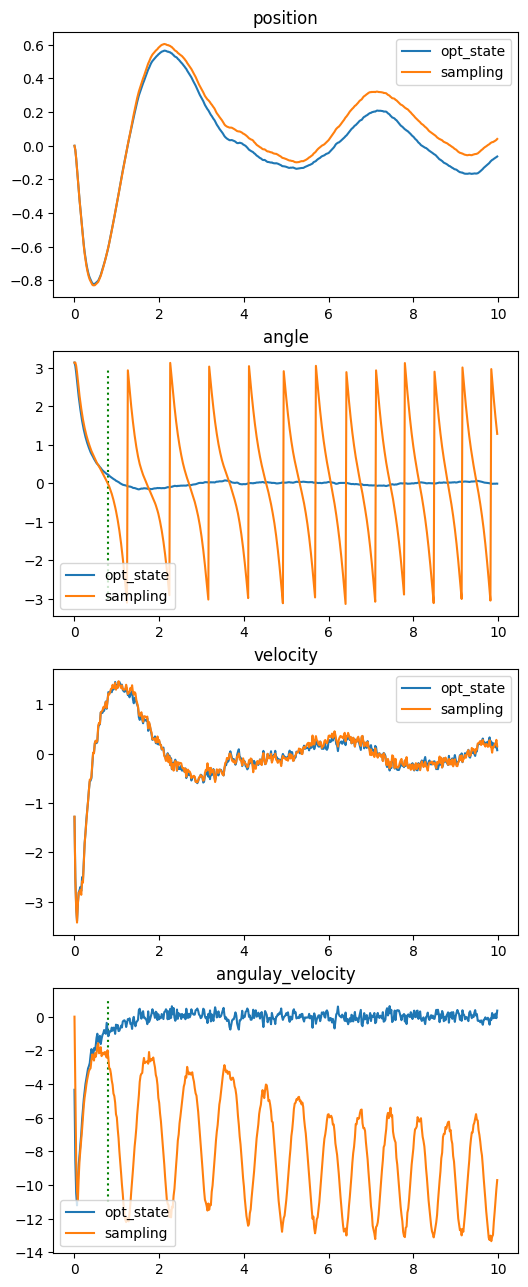

In [30]:
#時間幅
t = np.arange(0,10,h)
#グラフ化
fig = plt.figure(figsize=(6,20))
ax1 = fig.add_subplot(5,1,1)
ax1.plot(t,parameter.transpose()[0],label='opt_state')
ax1.plot(t,posi,label='sampling')
ax1.set_title('position')
ax1.legend()
ax2 = fig.add_subplot(5,1,2)
ax2.plot(t,parameter.transpose()[1],label='opt_state')
ax2.plot(t,angl,label='sampling')
ax2.set_title('angle')
ax2.legend()
zero = [t[i] for i in range(len(angl)) if abs(angl[i]) < 0.01 ]
if len(zero) != 0:
    ax2.vlines(zero[0], -3, 3,color='g', linestyles='dotted')
ax3 = fig.add_subplot(5,1,3)
ax3.plot(t,parameter.transpose()[2],label='opt_state')
ax3.plot(t,[-1*i for i in velo],label='sampling')
ax3.set_title('velocity')
ax3.legend()
ax4 = fig.add_subplot(5,1,4)
ax4.plot(t,parameter.transpose()[3],label='opt_state')
ax4.plot(t,[-1*i for i in angl_v],label='sampling')
ax4.set_title('angulay_velocity')
ax4.legend()
if len(zero) != 0:
    ax4.vlines(zero[0], -11, 1,color='g', linestyles='dotted')
plt.show()
#for i in range(100,200):
    #print(parameter[i][0]-posi[i],parameter[i][1]-angl[i],parameter[i][2]+velo[i],parameter[i][3]+angl_v[i])

 positionとvelocityに関しては、ほぼ同じ軌道になっているが、　　
 
 角度と角速度に関しては外れている．　　